#  Global Terrorism Data Analysis

The Global Terrorism Database (GTD) is an open-source database including
information on terrorist attacks around the world from 1970 through 2017.
The GTD includes systematic data on domestic as well as international terrorist
incidents that have occurred during this time period and now includes more than
180,000 attacks. The database is maintained by researchers at the 
National Consortium for the Study of Terrorism and 
Responses to Terrorism (START), headquartered at the University of Maryland.

#### Data Importing

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#import the data

path=r"C:\Users\ayush\Downloads\globalterrorismdb_0718dist(1).csv"
terrorism_data = pd.read_csv(path, low_memory=False, encoding='ISO-8859-1')


In [11]:
terrorism_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [12]:
terrorism_data.shape

(181691, 135)

We can see that the dataset contains huge amount of data , we will select 
suitable columns for our analysis. Also the dataset contains terror info 
from 1970 - 2016 we will slice the data for a shorter timeframe.

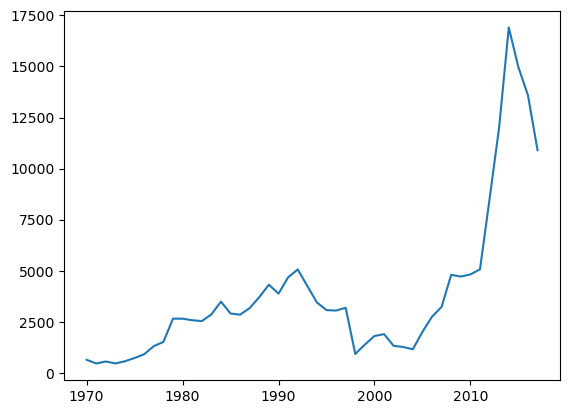

In [13]:
# let's see  worldwide terror activity since 1970

terr_activity = terrorism_data.groupby('iyear')['eventid'].count().to_frame()
# yearly trend
plt.plot(terr_activity)

##### We can see steady rise in terrorism since 2000. We will select the 2000-2017 timeframe for our analysis.


In [14]:
# selecting the columns
columns_to_keep = ['eventid','iyear','imonth','iday','country_txt',
'region_txt','success','suicide','attacktype1','attacktype1_txt','targtype1_txt',
'target1','gname', 'gsubname','nperps','weaptype1_txt','weapsubtype1_txt','nkill','nwound','city','provstate']

df = terrorism_data[terrorism_data['iyear'] >= 2000][columns_to_keep]

In [15]:
#setting the index 

df.set_index('eventid', drop=True, inplace=True)

In [16]:
#checking the new dataframe

df.head()

,iyear,imonth,iday,country_txt,region_txt,success,suicide,attacktype1,attacktype1_txt,targtype1_txt,target1,gname,gsubname,nperps,weaptype1_txt,weapsubtype1_txt,nkill,nwound,city,provstate
eventid,,,,,,,,,,,,,,,,,,,,
200001010001,2000,1,1,Namibia,Sub-Saharan Africa,1,0,2,Armed Assault,Business,A tavern in Muitjiku,National Union for the Total Independence of A...,NaN,NaN,Firearms,Unknown Gun Type,0.0,7.0,Muitjiku,Kavango
200001010002,2000,1,1,Namibia,Sub-Saharan Africa,1,0,6,Hostage Taking (Kidnapping),Business,The Bush Babies nightclub in Muitjiku,National Union for the Total Independence of A...,NaN,NaN,Firearms,Unknown Gun Type,0.0,7.0,Muitjiku,Kavango
200001010003,2000,1,1,India,South Asia,1,0,2,Armed Assault,Police,The Central Reserve Police Force 68 battalion ...,Lashkar-e-Taiba (LeT),NaN,NaN,Firearms,Unknown Gun Type,1.0,2.0,Udhampur,Jammu and Kashmir
200001010004,2000,1,1,Kosovo,Eastern Europe,1,0,3,Bombing/Explosion,Private Citizens & Property,"A Romany (gypsy) home in Pec, Kosovo",Unknown,NaN,NaN,Explosives,Unknown Explosive Type,0.0,1.0,Peje,Kosovo (Province)
200001010005,2000,1,1,Somalia,Sub-Saharan Africa,1,0,2,Armed Assault,Private Citizens & Property,Milk traders traveling from Mogadishu,Unknown,NaN,NaN,Firearms,Unknown Gun Type,6.0,10.0,Mogadishu,Banaadir


# Data Preparation

In [17]:
# data types of columns
df.dtypes
## which seems correct now 

iyear                 int64
imonth                int64
iday                  int64
country_txt          object
region_txt           object
success               int64
suicide               int64
attacktype1           int64
attacktype1_txt      object
targtype1_txt        object
target1              object
gname                object
gsubname             object
nperps              float64
weaptype1_txt        object
weapsubtype1_txt     object
nkill               float64
nwound              float64
city                 object
provstate            object
dtype: object

In [18]:
# checking null values
df.isnull().sum()

iyear                    0
imonth                   0
iday                     0
country_txt              0
region_txt               0
success                  0
suicide                  0
attacktype1              0
attacktype1_txt          0
targtype1_txt            0
target1                170
gname                    0
gsubname            108746
nperps               11353
weaptype1_txt            0
weapsubtype1_txt      8913
nkill                 4167
nwound                7980
city                   435
provstate               10
dtype: int64

terrorist group sub name is not of much concern to us and it has a lot of
missing values we can drop the column. however we need no of terrorists ,
killed and wounded information for our analysis. so we will drop these rows
containing missing data.

In [19]:
df.drop(columns=['gsubname','attacktype1'],inplace=True)

In [20]:
df.dropna(subset=('nperps','weapsubtype1_txt','nkill','nwound'),inplace=True)

In [21]:
df.dropna(subset=('city'),inplace=True)

In [22]:
df.dropna(subset=('provstate'),inplace=True)

In [23]:
df.target1.fillna('Unknown',inplace=True)

In [24]:
df.isna().sum()

iyear               0
imonth              0
iday                0
country_txt         0
region_txt          0
success             0
suicide             0
attacktype1_txt     0
targtype1_txt       0
target1             0
gname               0
nperps              0
weaptype1_txt       0
weapsubtype1_txt    0
nkill               0
nwound              0
city                0
provstate           0
dtype: int64

In [25]:
# null values are dealt with we will give better name to columns

df.rename(columns = {'iyear':'year','imonth':'month','iday':'day','country_txt':'country','region_txt':'region',
                     'attacktype1_txt':'attacktype','targtype1_txt':'targetype','target1':'target','weaptype1_txt':'weapontype',
                     'weapsubtype1_txt':'weaponsubtype','gname':'terroristgroup','nperps':'nperpetrators','nkill':'nkilled','nwound':'nwounded'},inplace = True)

In [26]:
df.head()

,year,month,day,country,region,success,suicide,attacktype,targetype,target,terroristgroup,nperpetrators,weapontype,weaponsubtype,nkilled,nwounded,city,provstate
eventid,,,,,,,,,,,,,,,,,,
200001010027,2000,1,1,United States,North America,1,0,Facility/Infrastructure Attack,Business,commercial logging equipment on the side of M-...,Earth Liberation Front (ELF),4.0,Incendiary,Gasoline or Alcohol,0.0,0.0,Mesick,Michigan
200001020002,2000,1,2,Algeria,Middle East & North Africa,1,0,Armed Assault,Private Citizens & Property,A family in El America,Unknown,10.0,Melee,Knife or Other Sharp Object,5.0,0.0,El Omaria,Medea (Province)
200001030008,2000,1,3,United States,North America,0,0,Bombing/Explosion,Abortion Related,Planned Parenthood of Cincinnati,Anti-Abortion extremists,-99.0,Explosives,Letter Bomb,0.0,0.0,Cincinnati,Ohio
200001030009,2000,1,3,United States,North America,0,0,Bombing/Explosion,Abortion Related,Unknown,Anti-Abortion extremists,-99.0,Explosives,Letter Bomb,0.0,0.0,Cincinnati,Ohio
200001030010,2000,1,3,Yemen,Middle East & North Africa,0,1,Bombing/Explosion,Military,USS The Sullivans,Al-Qaida,-99.0,Explosives,Vehicle,0.0,0.0,Aden,Adan


#### Now our data is prepared and ready for analysis

# Exploratory Data Analysis

In [27]:
##distribution of number of terrorists , casualties and wounded
df[['nperpetrators','nkilled','nwounded']].describe()

,nperpetrators,nkilled,nwounded
count,86568.000000,86568.000000,86568.000000
mean,-76.792602,1.989835,3.465634
std,51.020709,7.166689,14.221739
min,-99.000000,0.000000,0.000000
25%,-99.000000,0.000000,0.000000
50%,-99.000000,1.000000,0.000000
75%,-99.000000,2.000000,3.000000
max,3000.000000,670.000000,1500.000000


In [28]:
df.nperpetrators.value_counts()

nperpetrators
-99.0    69094
 1.0      6578
 2.0      4045
 3.0      1474
 4.0      1184
         ...  
 99.0        1
 64.0        1
 59.0        1
 28.0        1
 41.0        1
Name: count, Length: 81, dtype: int64

In [29]:
#this -99 must have been used for unknown terrorist count 
#will replace this with 0 since dropping these will lead to large loss of data
df.nperpetrators.replace(-99.0,0,inplace=True)

In [30]:
df[['nperpetrators','nkilled','nwounded']].describe()

,nperpetrators,nkilled,nwounded
count,86568.000000,86568.000000,86568.000000
mean,2.223963,1.989835,3.465634
std,25.934692,7.166689,14.221739
min,-9.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,0.000000,2.000000,3.000000
max,3000.000000,670.000000,1500.000000


In [31]:
df.nperpetrators.replace(-9.0,0,inplace=True)

In [32]:
df[['nperpetrators','nkilled','nwounded']].describe()

,nperpetrators,nkilled,nwounded
count,86568.000000,86568.000000,86568.000000
mean,2.224067,1.989835,3.465634
std,25.934665,7.166689,14.221739
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,0.000000,2.000000,3.000000
max,3000.000000,670.000000,1500.000000


In [33]:
df.city.nunique()

20840

In [34]:
df.provstate.nunique()

1684

In [35]:
df.provstate.value_counts()

provstate
Baghdad                       6258
Balochistan                   3274
Khyber Pakhtunkhwa            2940
Saladin                       2851
Al Anbar                      2780
                              ... 
Limousin                         1
Ionian Islands                   1
Romblon                          1
Marrakech-Tensift-El Haouz       1
Vidzeme                          1
Name: count, Length: 1684, dtype: int64

In [36]:
df.targetype.value_counts()

targetype
Private Citizens & Property       22641
Military                          13620
Police                            13236
Government (General)               9536
Business                           7164
Unknown                            4911
Religious Figures/Institutions     2469
Transportation                     2437
Educational Institution            2395
Utilities                          1891
Terrorists/Non-State Militia       1847
Journalists & Media                 972
Violent Political Party             947
Government (Diplomatic)             911
Telecommunication                   486
NGO                                 414
Airports & Aircraft                 267
Food or Water Supply                115
Tourists                            102
Other                                90
Maritime                             86
Abortion Related                     31
Name: count, dtype: int64

In [37]:
df.weapontype.value_counts()

weapontype
Explosives      54163
Firearms        26087
Incendiary       4420
Melee            1792
Chemical          105
Radiological        1
Name: count, dtype: int64

In [38]:
df.attacktype.value_counts()

attacktype
Bombing/Explosion                      50647
Armed Assault                          21534
Assassination                           5974
Facility/Infrastructure Attack          4488
Hostage Taking (Kidnapping)             3141
Unarmed Assault                          305
Hostage Taking (Barricade Incident)      276
Hijacking                                196
Unknown                                    7
Name: count, dtype: int64

In [39]:
#most violent groups
df.terroristgroup.value_counts()

terroristgroup
Unknown                                        48154
Taliban                                         5284
Islamic State of Iraq and the Levant (ISIL)     4043
Al-Shabaab                                      2098
Boko Haram                                      1654
                                               ...  
United Karbi Liberation Army (UKLA)                1
Terai Rastriya Mukti Sena (TRMS)                   1
Minutemen American Defense                         1
Rohingya Solidarity Organization                   1
National Freedom Party                             1
Name: count, Length: 1169, dtype: int64

In [40]:
df.country.nunique()

165

In [41]:
df.region.nunique()

12

We have data from 165 countries across 12 regions

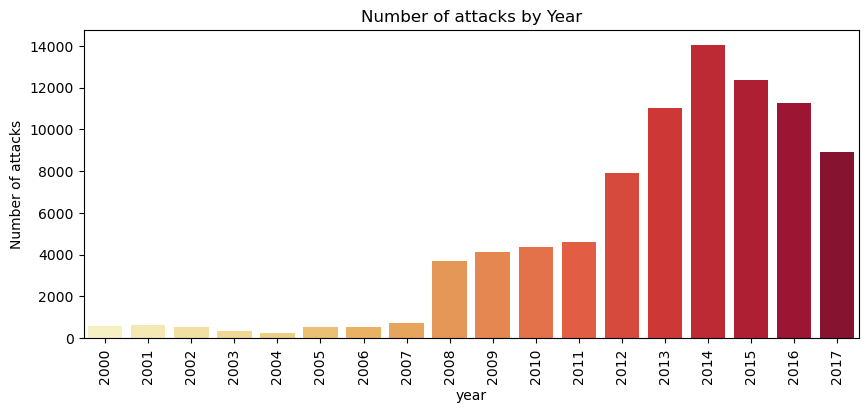

In [52]:
# attacks by year

plt.figure(figsize=(10,4))
sns.countplot(x='year',data =df,palette='YlOrRd')

plt.xticks(rotation=90)
plt.ylabel('Number of attacks')
plt.title('Number of attacks by Year')
plt.show()

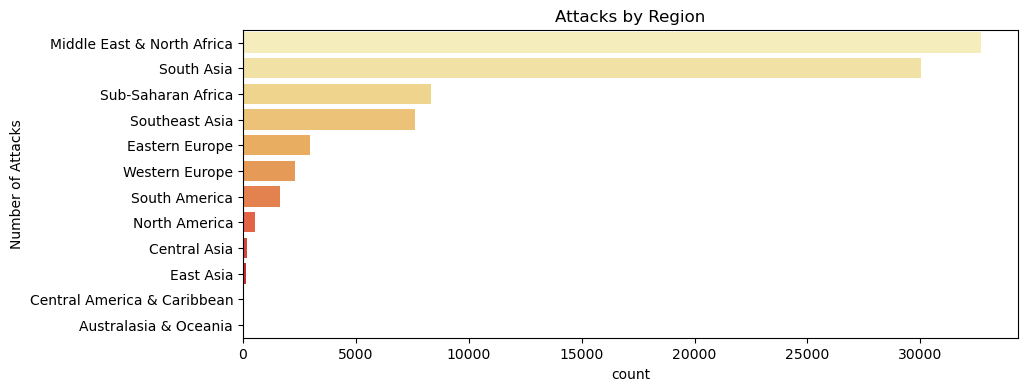

In [51]:
# attacks by region

plt.figure(figsize = (10,4))
sns.countplot(y ='region', data = df , palette = 'YlOrRd',
              order = df.region.value_counts().index)
plt.ylabel('Number of Attacks')
plt.title('Attacks by Region')
plt.show()

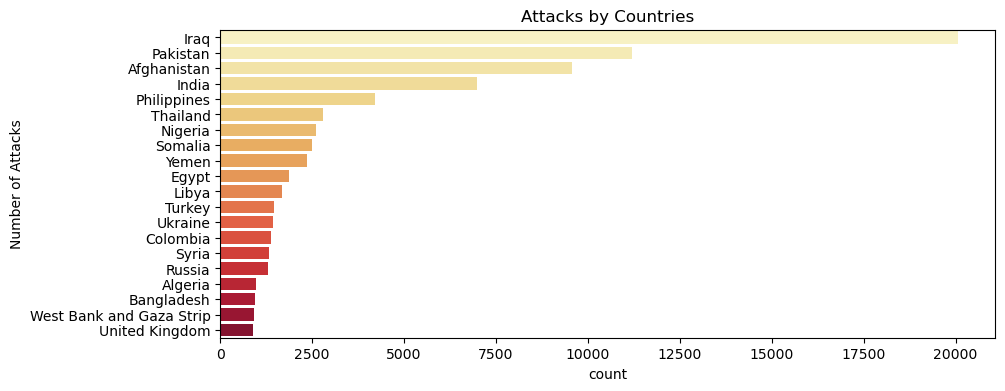

In [55]:
#attacks by countries
plt.figure(figsize = (10,4))
sns.countplot(y ='country', data = df , palette = 'YlOrRd',
              order = df.country.value_counts().nlargest(20).to_frame().index)
plt.ylabel('Number of Attacks')
plt.title('Attacks by Countries')
plt.show()

In [44]:
# number of incidents and casualties by year

casualties = df.groupby('year').agg({'year':'count','nkilled':'sum','nwounded':'sum'})

casualties = casualties.rename(columns = {'year':'Total attacks','nkilled':'Total killed','nwounded':'Total injured'}).reset_index()

casualties.head()

,year,Total attacks,Total killed,Total injured
0,2000,576,1287.0,1934.0
1,2001,652,1353.0,2909.0
2,2002,546,1850.0,3781.0
3,2003,332,1242.0,2979.0
4,2004,274,1351.0,2714.0


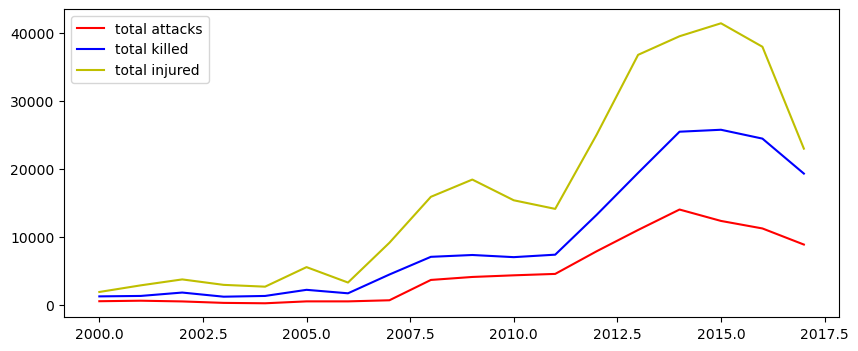

In [49]:
#plotting trends of attacks ,deaths and wounded

plt.figure(figsize = (10,4))
plt.plot('year','Total attacks',data = casualties,color='r',label='total attacks')
plt.plot('year','Total killed',data = casualties,color='b',label='total killed')
plt.plot('year','Total injured',data = casualties,color='y',label='total injured')
plt.legend()
plt.show()

# Exporting the Data

In [ ]:
filepath=r"D:\DATA SCIENCE\terrorism.csv"
df.to_csv(filepath)